# Step1. 사진 모으기

# Step2. 얼굴 영역 자르기

In [63]:
import face_recognition
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#이미지 불러오기
dir_path = os.getenv('HOME')+'/aiffel/finding_celebrities/images'
new_path = os.getenv('HOME')+'/aiffel/finding_celebrities/result'
file_list = os.listdir(dir_path)

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if face_locations:
        a,b,c,d=face_locations[0]
        cropped_face=image[a:c,d:b,:]
        return cropped_face
    else:
        return [] #얼굴영역 못잡았을 때 예외처리 

# Step3. 얼굴 영역의 임베딩 추출하기

[array([-0.14591762,  0.0948265 ,  0.00770712, -0.11283736, -0.19994532,
        -0.03075367, -0.14201614, -0.10948268,  0.14500193, -0.16492571,
         0.22160444, -0.07646248, -0.23760286, -0.02854759, -0.12920642,
         0.24437766, -0.18234935, -0.16711026,  0.02756727,  0.03923991,
         0.12134771, -0.01816755,  0.05750898,  0.12277114, -0.08319088,
        -0.34955993, -0.11640248, -0.10331334, -0.08350635, -0.08060138,
        -0.03239288, -0.02848287, -0.17708202, -0.00862579, -0.00877291,
         0.07989736, -0.05090069, -0.13315555,  0.16829887,  0.01052258,
        -0.29098931,  0.03185285,  0.07573412,  0.19727677,  0.16184539,
         0.04236599,  0.06129831, -0.18840656,  0.12510677, -0.15480463,
         0.03562515,  0.16711141,  0.06677707, -0.02299262,  0.01348232,
        -0.07504877,  0.07102869,  0.18897368, -0.13329513,  0.01286954,
         0.16403897, -0.00585481,  0.00190308, -0.12981361,  0.2684772 ,
         0.12359271, -0.12852231, -0.18507932,  0.1

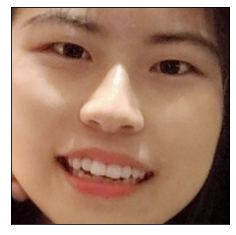

In [64]:
image_file = os.path.join(dir_path,'yejin.jpg')
face = get_cropped_face(image_file)  

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(face)
plt.savefig(new_path + '/' + 'yejin.jpg')

#embedding 벡터 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

In [65]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    image_dict={}
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:   
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            image_dict[os.path.splitext(file)[0]]=face
    return embedding_dict, image_dict  #image_dict을 해서 따로 얼굴영역만 저장

embedding_dict, image_dict=get_face_embedding_dict(dir_path)
embedding_dict['yejin']

array([-0.14591762,  0.0948265 ,  0.00770712, -0.11283736, -0.19994532,
       -0.03075367, -0.14201614, -0.10948268,  0.14500193, -0.16492571,
        0.22160444, -0.07646248, -0.23760286, -0.02854759, -0.12920642,
        0.24437766, -0.18234935, -0.16711026,  0.02756727,  0.03923991,
        0.12134771, -0.01816755,  0.05750898,  0.12277114, -0.08319088,
       -0.34955993, -0.11640248, -0.10331334, -0.08350635, -0.08060138,
       -0.03239288, -0.02848287, -0.17708202, -0.00862579, -0.00877291,
        0.07989736, -0.05090069, -0.13315555,  0.16829887,  0.01052258,
       -0.29098931,  0.03185285,  0.07573412,  0.19727677,  0.16184539,
        0.04236599,  0.06129831, -0.18840656,  0.12510677, -0.15480463,
        0.03562515,  0.16711141,  0.06677707, -0.02299262,  0.01348232,
       -0.07504877,  0.07102869,  0.18897368, -0.13329513,  0.01286954,
        0.16403897, -0.00585481,  0.00190308, -0.12981361,  0.2684772 ,
        0.12359271, -0.12852231, -0.18507932,  0.17621635, -0.14

# Step4. 모은 연예인들과 비교하기

순위 1 : 이름(공명), 거리(0.444813447078026)
순위 2 : 이름(강다니엘), 거리(0.4625291382337036)
순위 3 : 이름(써니), 거리(0.4807095221356891)
순위 4 : 이름(박소담), 거리(0.4969772278421623)
순위 5 : 이름(츄), 거리(0.5071345969621301)


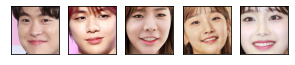

In [66]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

def get_nearest_face(name, top=5): 
    pass
get_nearest_face('yejin')

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('yejin')   

sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

fig = plt.figure()

def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if i == 1:    # 두번째로 나오는 이름도 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            fig.add_subplot(2,top,i-1)
            ax = plt.gca()
            ax.axes.xaxis.set_visible(False)
            ax.axes.yaxis.set_visible(False)
            plt.imshow(image_dict[sorted_faces[i][0]])
            plt.savefig(new_path + '/' + sorted_faces[i][0] +'.jpg')

get_nearest_face('yejin')

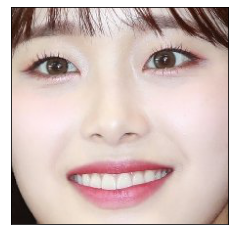

In [67]:
for i in range(7):
        if i == 0 :   
            continue
        if i == 1:    
            continue
        if sorted_faces[i]:
            ax = plt.gca()
            ax.axes.xaxis.set_visible(False)
            ax.axes.yaxis.set_visible(False)
            plt.imshow(image_dict[sorted_faces[i][0]])
            plt.savefig(new_path + '/' + sorted_faces[i][0] +'.jpg')

# Step5. 다양한 재미있는 시각화 시도해 보기

1번째  닮은 연예인 : 공명
2번째  닮은 연예인 : 강다니엘
3번째  닮은 연예인 : 써니
4번째  닮은 연예인 : 박소담
5번째  닮은 연예인 : 츄


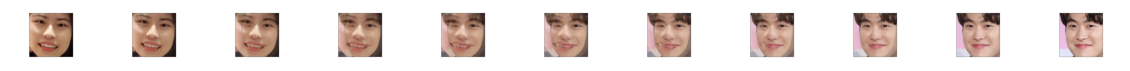

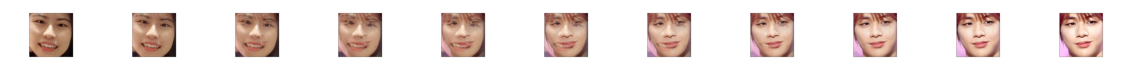

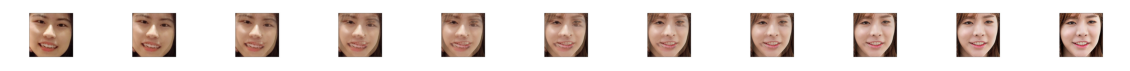

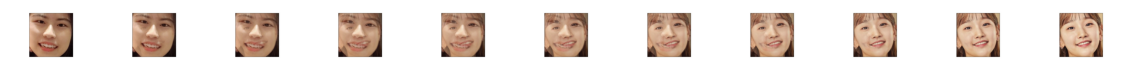

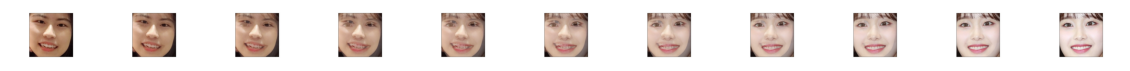

In [74]:
import cv2
from PIL import Image
img2 = cv2.imread("/aiffel/aiffel/finding_celebrities/result/yejin.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


for k in range(7):
    if k == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
    if k == 1:    # 두번째로 나오는 이름도 자기 자신일 것이므로 제외
            continue
    a = 0.0
    i = 0

    fig, axes = plt.subplots(1, 11, figsize=(20, 20))
    
    img1 = cv2.imread('/aiffel/aiffel/finding_celebrities/result/' + sorted_faces[k][0] + '.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    
    print('{}번째  닮은 연예인 : {}'.format(k-1, sorted_faces[k][0]))
    
    while(i < 11):
        # 블렌딩하는 두 이미지의 크기가 같게 함
        width = img1.shape[1]
        height = img1.shape[0]
        img2 = cv2.resize(img2, (width, height))

        # 내 사진에서 점점 연예인 사진으로 블랜딩
        b = 1.0 - a
        dst1 = cv2.addWeighted(img1, a, img2, b, 0)
        axes[i].imshow(dst1)
        axes[i].axis('off')
        a = a + 0.1
        i = i +1

# 회고
## 처음부터 오류 투성이어서 고치기가 많이 어려웠다.

## 1. 이미지의 얼굴을 인식하지 못하면 오류가 발생하는데, get_cropped_face 함수에 else 일때도 정의해줘서 오류를 고쳤다.
## 2. 연예인사진 폴더에 있는 사진들을 내 맘대로 삭제하고 추가하면 오류가 발생하는데, ipynb.checkpoints를 삭제해서 오류를 고쳤다.

##  다양한 재미있는 시각화 시도해 보기에서 사진을 블렌딩하는 것을 하고 싶어서 open cv를 사용했는데 많이 어려웠다.
## - opencv에서 이미지를 불러오려면 얼굴을 크롭한 이미지가 따로 저장되어 있어야해서 크롭한 이미지를 따로 저장하는 과정을 거쳤다.
## - 츄 사진이 뜨는거를 없애려고 plt.imshow(image_dict[sorted_faces[i][0]])한 줄을 아예 없애니깐 빈 사진이 저장되었다. 그래서 츄 사진이 뜨는 거는 고치지 못했다. 아직 어떻게 안 뜨게 하는지 모르겠다.